# Anomaly Detection

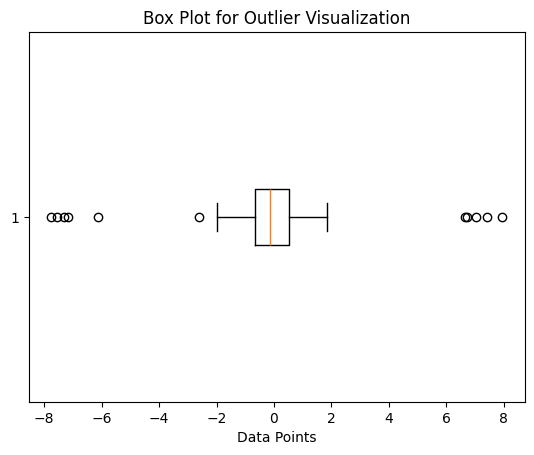

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate example data with outliers
np.random.seed(42)

# Generate normally distributed data
normal_data = np.random.normal(loc=0, scale=1, size=100)

# Introduce outliers
outliers_low = np.random.uniform(low=-8, high=-6, size=5)
outliers_high = np.random.uniform(low=6, high=8, size=5)

# Combine normal data with outliers
data = np.concatenate([normal_data, outliers_low, outliers_high])

# Create a box plot to visualize outliers
plt.boxplot(data, vert=False)
plt.title('Box Plot for Outlier Visualization')
plt.xlabel('Data Points')
plt.show()


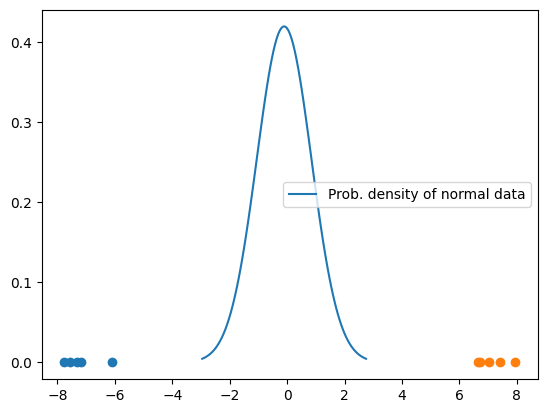

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = normal_data.mean()
variance = normal_data.std()
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label=f'Prob. density of normal data')
plt.scatter(outliers_low, stats.norm.pdf(outliers_low, mu, sigma))
plt.scatter(outliers_high, stats.norm.pdf(outliers_high, mu, sigma))
#plt.scatter(data, stats.norm.pdf(data, mu, sigma))

plt.legend()
plt.show()

In [3]:
np.percentile(x, 99)

2.690880085414403

## Types of anomalies
https://hackernoon.com/3-types-of-anomalies-in-anomaly-detection

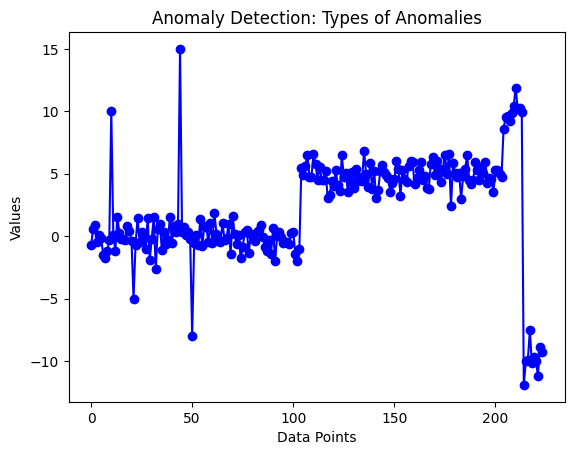

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Generate example data with anomalies
np.random.seed(42)

# Generate normal data
normal_data = np.random.normal(loc=0, scale=1, size=100)

# Introduce point anomalies
point_anomalies = np.array([10, -8, 15, -5])

# Introduce contextual anomalies (shift the entire distribution)
contextual_anomalies = normal_data + 5

# Introduce collective anomalies (create a cluster of anomalies)
cluster_anomalies = np.concatenate([np.random.normal(loc=10, scale=1, size=10),
                                    np.random.normal(loc=-10, scale=1, size=10)])

# Combine normal data with anomalies
data = np.concatenate([normal_data, point_anomalies])#, contextual_anomalies, cluster_anomalies, normal_data])
np.random.shuffle(data)
data = np.concatenate([data, contextual_anomalies, cluster_anomalies])

# Create a line plot to visualize anomalies
plt.plot(data, marker='o', color='b')
#plt.scatter(range(len(data)), data, marker='o', color='b')
plt.title('Anomaly Detection: Types of Anomalies')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.show()


## Statistical methods

Z-Scores:
- Definition: A Z-Score (or Standard Score) measures how many standard deviations a data point is from the mean of a dataset.
- Interpretation: A high absolute Z-Score (e.g., greater than 3 or less than -3) indicates that the data point is far from the mean and may be considered an outlier.
- Usage: Z-Scores are often used in univariate data analysis, where only one variable is considered at a time. They are simple to calculate and provide a standardized measure of how far a data point deviates from the mean.


Mahalanobis Distance: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.mahalanobis.html, see: https://medium.com/@the_daft_introvert/mahalanobis-distance-5c11a757b099
- Definition: Mahalanobis Distance is a measure of the distance between a data point and the centroid of a dataset, considering the covariance between features.
- Interpretation: A high Mahalanobis Distance suggests that a data point is far from the centroid, accounting for the correlation between features. It is especially useful when dealing with multivariate data.
- Usage: Mahalanobis Distance is particularly useful when dealing with multivariate data where variables may be correlated. It accounts for the covariance structure, making it more robust in such scenarios.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Generate example data with anomalies
np.random.seed(42)

# Generate normal data
normal_data = np.random.normal(loc=0, scale=1, size=300)

#st_deviation = normal_data.std()
threshold = 3

Text(0.5, 1.0, 'Z-Score Anomaly Detection')

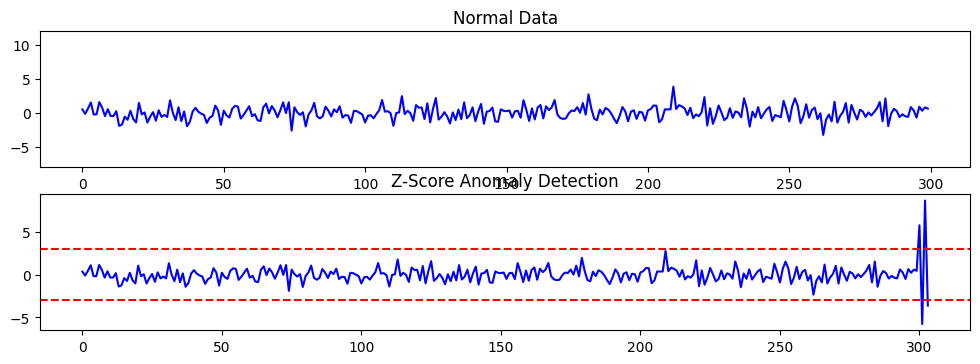

In [6]:
# Introduce anomalies
anomalies = np.array([8, -8, 12, -5])

# Combine normal data with anomalies
data = np.concatenate([normal_data, anomalies])

# Calculate Z-Scores
z_scores = zscore(data)


# Plot the results
plt.figure(figsize=(12, 6))

# Plot normal data
plt.subplot(3, 1, 1)
plt.plot(data[:-len(anomalies)], color='b', label='Normal Data')
plt.title('Normal Data')
plt.ylim(anomalies.min(), anomalies.max())


# Plot Z-Scores
plt.subplot(3, 1, 2)
plt.plot(z_scores, color='b', label='Z-Scores')
plt.axhline(y=threshold, color='r', linestyle='--', label='Z-Score Threshold')
plt.axhline(y=-threshold, color='r', linestyle='--')
plt.title('Z-Score Anomaly Detection')

In [7]:
z_scores

array([ 3.44962826e-01, -1.12175526e-01,  4.53653414e-01,  1.08383556e+00,
       -1.81208692e-01, -1.81196873e-01,  1.12428321e+00,  5.39861972e-01,
       -3.50622723e-01,  3.77968536e-01, -3.46262344e-01, -3.47926860e-01,
        1.61559981e-01, -1.39005804e+00, -1.25445079e+00, -4.17441443e-01,
       -7.41800094e-01,  2.13599973e-01, -6.66346636e-01, -1.02939133e+00,
        1.04252535e+00, -1.75177807e-01,  3.59801261e-02, -1.03835045e+00,
       -4.04551284e-01,  6.72209305e-02, -8.41267024e-01,  2.57840002e-01,
       -4.45051492e-01, -2.22633582e-01, -4.45820318e-01,  1.32087044e+00,
       -2.23522961e-02, -7.74110295e-01,  5.79537299e-01, -8.91554002e-01,
        1.37731338e-01, -1.42345538e+00, -9.68832730e-01,  1.29090512e-01,
        5.19007009e-01,  1.10737437e-01, -9.58936358e-02, -2.29408059e-01,
       -1.07706368e+00, -5.30870804e-01, -3.44261722e-01,  7.48415922e-01,
        2.34744928e-01, -1.28189609e+00,  2.20681636e-01, -2.89866538e-01,
       -4.99969933e-01,  

In [8]:
# Calculate Mahalanobis Distances directly
from scipy.spatial.distance import mahalanobis
from sklearn.datasets import make_blobs
# Create a dataset with 2 clusters
X, y = make_blobs(n_samples=300, centers=2, random_state=42)

# Calculate the mean vector and covariance matrix of the dataset
mean = np.mean(X, axis=0)
covariance_matrix = np.cov(X.T)

inv_cov_matrix = np.linalg.inv(covariance_matrix)

# Choose a point for which we want to calculate Mahalanobis distance
test_point = np.array([3, 4])

# Calculate Mahalanobis distance
distance = mahalanobis(test_point, mean, covariance_matrix)
distance

12.498347263009125

In [9]:
import numpy as np
from scipy.spatial.distance import mahalanobis
from sklearn.datasets import make_blobs

# Create a dataset with 2 clusters
X, y = make_blobs(n_samples=100, centers=2, random_state=42)

# Calculate the mean vector and covariance matrix of the dataset
mu = np.mean(X, axis=0)
sigma = np.cov(X.T)

# Calculate the Mahalanobis Distance between two points
x1 = [2, 2]
x2 = [-2, -2]
dist_x1 = mahalanobis(x1, mu, np.linalg.inv(sigma))
dist_x2 = mahalanobis(x2, mu, np.linalg.inv(sigma))

# Print the distances
print("Distance between point x1 and the distribution:", dist_x1)
print("Distance between point x2 and the distribution:", dist_x2)

#OUTPUT


Distance between point x1 and the distribution: 2.099478227196238
Distance between point x2 and the distribution: 8.065203145117378


### Isolation Forest

Isolation Forests(IF), similar to Random Forests, are build based on decision trees. And since there are no pre-defined labels here, it is an unsupervised model.

IsolationForests were built based on the fact that anomalies are the data points that are “few and different”.
In an Isolation Forest, randomly sub-sampled data is processed in a tree structure based on randomly selected features. The samples that travel deeper into the tree are less likely to be anomalies as they required more cuts to isolate them. Similarly, the samples which end up in shorter branches indicate anomalies as it was easier for the tree to separate them from other observations.
Source: https://www.analyticsvidhya.com/blog/2021/07/anomaly-detection-using-isolation-forest-a-complete-guide/

normal:

![normal](https://upload.wikimedia.org/wikipedia/commons/c/ce/Isolating_a_Non-Anomalous_Point.png)

anomaly:

![anomaly](https://upload.wikimedia.org/wikipedia/commons/f/ff/Isolating_an_Anomalous_Point.png)

Isolation tree:
![tree](https://content.linkedin.com/content/dam/engineering/site-assets/images/blog/posts/2019/08/IsolationForest1.png)


Anomalies are data points that are few and different. As a result of these properties, we show that, anomalies are susceptible to a mechanism called isolation. This paper proposes a method called Isolation Forest (iForest) which detects anomalies purely based on the concept of isolation without employing any distance or density measure—fundamentally different from all existing methods.
Source: https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/tkdd11.pdf

https://blog.paperspace.com/anomaly-detection-isolation-forest/

In [10]:
from sklearn.ensemble import IsolationForest
# Train Isolation Forest model
isolation_forest = IsolationForest(contamination="auto", random_state=42)
isolation_forest.fit_predict(data.reshape(-1, 1))

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1, -1,  1,  1

In [11]:
isolation_forest.decision_function(data.reshape(-1, 1))

array([ 1.07253237e-01,  1.09114845e-01,  1.10399381e-01,  3.77314801e-02,
        1.19711312e-01,  1.19711312e-01,  3.49102280e-02,  9.84504627e-02,
        1.08998318e-01,  1.08595288e-01,  1.07133116e-01,  1.10452135e-01,
        1.27311096e-01, -2.03191097e-02, -2.27205547e-02,  9.59491895e-02,
        8.26135160e-02,  1.28745202e-01,  8.39715947e-02,  6.32261404e-02,
        4.68091616e-02,  1.16969318e-01,  1.25021794e-01,  6.38487150e-02,
        9.34183346e-02,  1.14920115e-01,  7.64966903e-02,  1.20124469e-01,
        9.33535818e-02,  1.10586511e-01,  9.30783573e-02,  3.91168745e-03,
        1.13474679e-01,  7.80124839e-02,  1.02270091e-01,  7.68974223e-02,
        1.23921466e-01, -2.03088835e-02,  6.80261900e-02,  1.23464352e-01,
        1.00895243e-01,  1.20265942e-01,  1.07268159e-01,  1.12758406e-01,
        4.84146945e-02,  9.59593971e-02,  1.05851467e-01,  7.65443354e-02,
        1.25078175e-01, -2.97428617e-02,  1.27367440e-01,  1.04778028e-01,
        9.14149321e-02,  

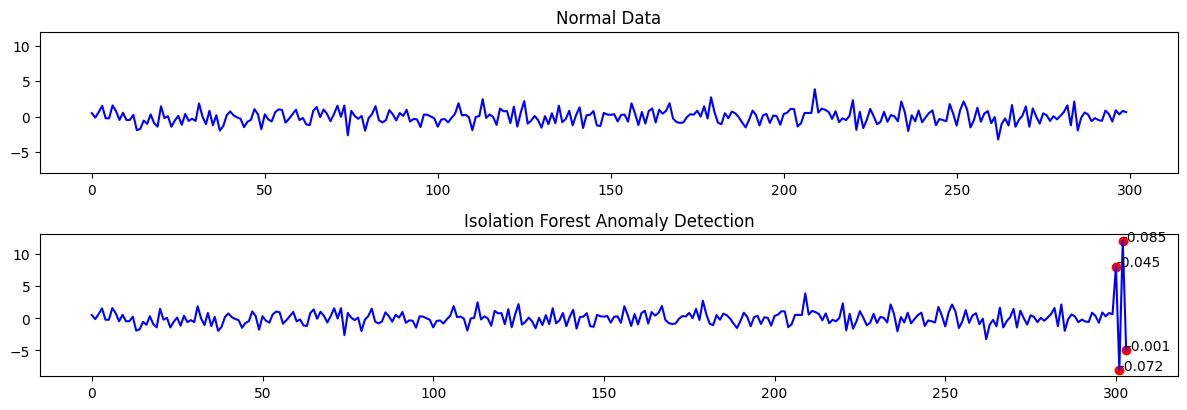

In [12]:
import numpy as np
import matplotlib.pyplot as plt


# Generate example data with anomalies
np.random.seed(42)

# Generate normal data
normal_data = np.random.normal(loc=0, scale=1, size=300)

# Introduce point anomalies
point_anomalies = np.array([8, -8, 12, -5])

# Combine normal data with point anomalies
data_point_anomalies = np.concatenate([normal_data, point_anomalies])

# Reshape data for model fitting
data_point_anomalies = data_point_anomalies.reshape(-1, 1)

# Train Isolation Forest model
isolation_forest = IsolationForest(contamination=0.01, random_state=42)
isolation_forest.fit(data_point_anomalies)

# Predict outliers using Isolation Forest
outliers_isolation_forest = isolation_forest.predict(data_point_anomalies)
scores_isolation_forest = isolation_forest.decision_function(data_point_anomalies)


# Plot the results
plt.figure(figsize=(12, 6))

# Plot normal data
plt.subplot(3, 1, 1)
plt.plot(data_point_anomalies[:-len(point_anomalies)], color='b', label='Normal Data')
plt.title('Normal Data')
plt.ylim(data_point_anomalies.min(), data_point_anomalies.max())

# Plot Isolation Forest results
plt.subplot(3, 1, 2)
plt.plot(data_point_anomalies, color='b', label='Normal Data')
plt.scatter(np.where(outliers_isolation_forest == -1), data_point_anomalies[outliers_isolation_forest == -1],
            color='r', label='Isolation Forest Outliers')

for i, score in enumerate(scores_isolation_forest[outliers_isolation_forest == -1]):
    score_rounded = round(score, 3)
    plt.annotate(score_rounded, (np.where(outliers_isolation_forest == -1)[0][i], data_point_anomalies[outliers_isolation_forest == -1][i][0]))
plt.title('Isolation Forest Anomaly Detection')

plt.tight_layout()
plt.show()


In [13]:
scores_isolation_forest[outliers_isolation_forest == -1]

array([-0.04492508, -0.07167066, -0.08479735, -0.00119685])

In [14]:
data_point_anomalies[outliers_isolation_forest == -1][0]

array([8.])

In [15]:
scores_isolation_forest[outliers_isolation_forest == -1]

array([-0.04492508, -0.07167066, -0.08479735, -0.00119685])

In [16]:
outliers_isolation_forest

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

## Local Outlier Factor (LOF)
https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html


See: https://en.wikipedia.org/wiki/Local_outlier_factor#

Reachability distance:
![reachability](https://miro.medium.com/v2/resize:fit:890/format:webp/1*7lxC1QRQxxsYBDC0-Q1KTg.png)

https://medium.com/@pramodch/understanding-lof-local-outlier-factor-for-implementation-1f6d4ff13ab9

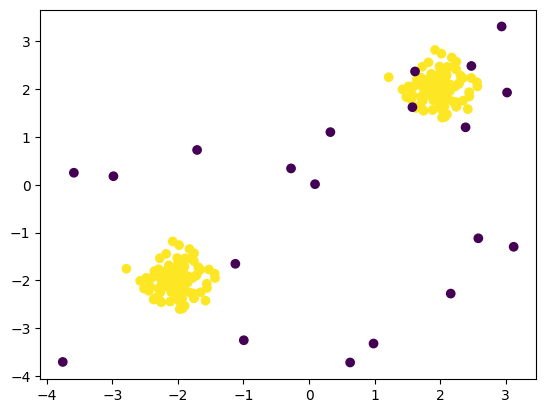

In [17]:
import numpy as np

np.random.seed(42)

X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

plt.scatter(X[:, 0], X[:, 1], c=ground_truth)

In [18]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

In [19]:
X_scores

array([-0.99994411, -1.14405944, -0.97422441, -1.29043229, -0.96406015,
       -0.967451  , -1.16897405, -1.17786476, -1.01083896, -1.14511932,
       -1.21255557, -1.05066867, -0.96961357, -1.02846721, -0.96108146,
       -1.30563699, -1.01782283, -1.09341031, -1.20053   , -1.048392  ,
       -1.04273309, -0.96537973, -1.12978593, -1.04714221, -1.1241528 ,
       -0.97795087, -0.97358493, -1.13261793, -0.98280096, -1.02069094,
       -0.95891097, -1.1491003 , -1.11886905, -0.99855726, -0.99357848,
       -1.13283666, -1.1460512 , -1.87981613, -0.95747372, -1.2240096 ,
       -0.9432555 , -1.25135605, -1.00309851, -1.10715506, -0.97725017,
       -0.99886729, -0.97739557, -1.09329811, -0.99310409, -0.96318902,
       -1.08969429, -0.97382438, -0.94892287, -1.42556212, -0.96379941,
       -1.27724298, -1.46492263, -0.94595752, -1.04083691, -1.1733885 ,
       -1.06562769, -1.29284358, -1.32423841, -1.06358314, -0.96642636,
       -1.08777278, -1.03217634, -1.24655122, -0.97201908, -1.09

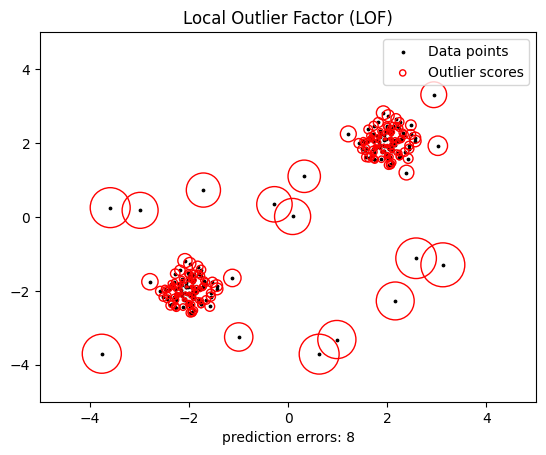

In [20]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection


def update_legend_marker_size(handle, orig):
    "Customize size of the legend marker"
    handle.update_from(orig)
    handle.set_sizes([20])


plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())  # norm
scatter = plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
plt.legend(
    handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)}
)
plt.title("Local Outlier Factor (LOF)")
plt.show()

## Novelty detection

Is the new observation so different from the others that we can doubt it is regular? (i.e. does it come from the same distribution?) Or on the contrary, is it so similar to the other that we cannot distinguish it from the original observations? This is the question addressed by the novelty detection tools and methods.

https://scikit-learn.org/0.20/modules/outlier_detection.html#outlier-detection

https://www.analyticsvidhya.com/blog/2022/06/one-class-classification-using-support-vector-machines/

Text(0.5, 1.0, 'One-Class SVM Anomaly Detection')

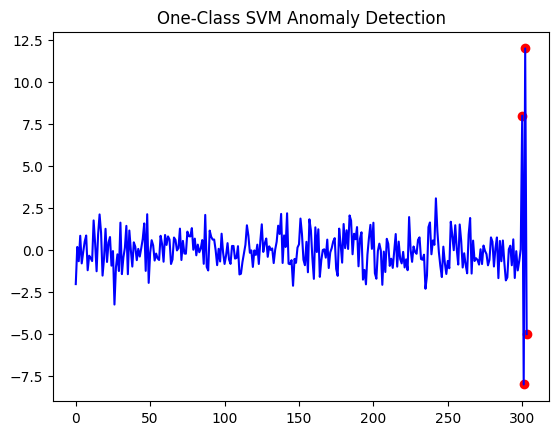

In [21]:
# Train One-Class SVM model
from sklearn.svm import OneClassSVM
# Generate normal data
normal_data = np.random.normal(loc=0, scale=1, size=300)

# Introduce point anomalies
point_anomalies = np.array([8, -8, 12, -5])

# Combine normal data with point anomalies
data_point_anomalies = np.concatenate([normal_data, point_anomalies])
one_class_svm = OneClassSVM(nu=0.05)
one_class_svm.fit(normal_data.reshape(-1, 1))

# Predict outliers using One-Class SVM
outliers_one_class = one_class_svm.predict(point_anomalies.reshape(-1, 1))
outliers_one_class_svm = np.concatenate([np.ones(len(normal_data), dtype=int), outliers_one_class])
#plt.subplot(3, 1, 3)
plt.plot(data_point_anomalies, color='b', label='Normal Data')
plt.scatter(np.where(outliers_one_class_svm == -1), data_point_anomalies[outliers_one_class_svm == -1],
            color='r', label='One-Class SVM Outliers')
plt.title('One-Class SVM Anomaly Detection')

In [22]:
# також
lof = LocalOutlierFactor(novelty=True)

In [23]:
outliers_one_class

array([-1, -1, -1, -1])